In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

microm2m = 1.0E-6
m2microm = 1.0E6

## Create array of particles with diameter, TRM and Hc

In [2]:
def create_particle(Hc, sigma_Hc, N_Hc):
    Hc_array = np.absolute(np.random.normal(Hc, sigma_Hc, N_Hc))
    diameter_array = (Hc_array/3.781816)**(1/(-0.5551526))
    TRM_array = []
    
    for i in range(len(diameter_array)):
        if (diameter_array[i])<=1.0:
            TRM = 0.7924749*(diameter_array[i])**(-0.5400302)
        else:
            TRM = 0.7924749*(diameter_array[i])**(-0.5400302)
        TRM_array = np.append(TRM_array, TRM)
    
    
    return(diameter_array, TRM_array, Hc_array)


def create_particle_new(Hc, sigma_Hc, N_Hc, Phi, delta_Phi, M, delta_M):
    #coercivity in mT
    Hc_array = np.absolute(np.random.normal(Hc, sigma_Hc, N_Hc))
    
    # diameter in micrometers
    diameter_array = np.random.normal(Phi, delta_Phi, np.size(Hc_array))
    
    #magnetization in kA/m
    TRM_array = np.random.normal(M, delta_M, np.size(Hc_array))
    
    
    return(diameter_array, TRM_array, Hc_array)


In [3]:
# diameter_array_1, TRM_array_1, Hc_array_1 = create_particle(30, 2, 50)
# diameter_array_2, TRM_array_2, Hc_array_2 = create_particle(12, 2, 50)

diameter_array_1, TRM_array_1, Hc_array_1 = create_particle_new(100, 10, 50, 0.5, 0.1, 50, 2)
diameter_array_2, TRM_array_2, Hc_array_2 = create_particle_new( 25, 10, 50, 0.8, 0.1, 50, 2)


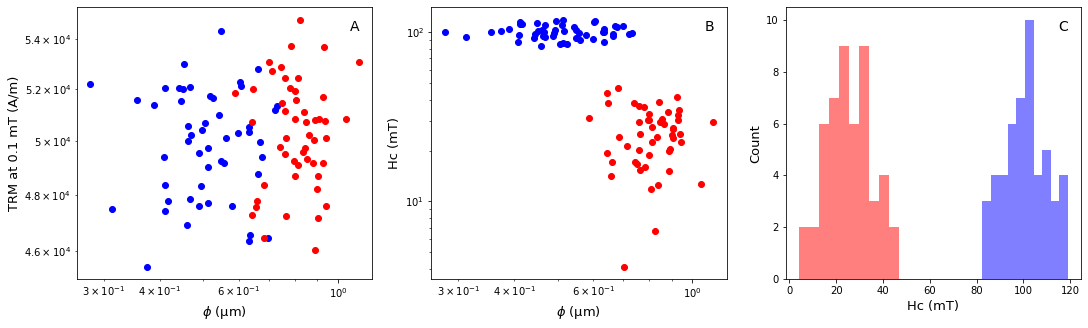

In [4]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(18,5))

ax1.scatter([],[], label='A', marker='')
ax1.scatter(diameter_array_1, TRM_array_1*1000, color='b')
ax1.scatter(diameter_array_2, TRM_array_2*1000, color='r')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('TRM at 0.1 mT (A/m)', fontsize=13)
ax1.set_xlabel('$\phi$ (μm)', fontsize=13)
ax1.legend(frameon=False, loc='upper right', fontsize=14)
# ax1.set_ylim(10, 10000)
#ax1.set_xlim(0.04, 20)


ax2.scatter([],[], label='B', marker='')
ax2.scatter(diameter_array_1, Hc_array_1, color='b')
ax2.scatter(diameter_array_2, Hc_array_2, color='r')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel('Hc (mT)', fontsize=13)
ax2.set_xlabel('$\phi$ (μm)', fontsize=13)
ax2.legend(frameon=False, loc='upper right', fontsize=14)
# ax2.set_ylim(0.1, 90)
#ax2.set_xlim(0.04, 20)


ax3.hist(Hc_array_1, bins=10, histtype='stepfilled', alpha=0.5, color='b')
ax3.hist(Hc_array_2, bins=10, histtype='stepfilled', alpha=0.5, color='r')
ax3.set_xlabel('Hc (mT)', fontsize=13)
ax3.set_ylabel('Count', fontsize=13)
ax3.scatter([],[], label='C', marker='')
ax3.legend(frameon=False, loc='upper right', fontsize=14)
#ax3.set_xlim(0,20)

## Completing the dataset with: D, I, Xc, Yc and Zc


In [10]:
# First particles assembly
size_1 = len(TRM_array_1)

D_1  = np.random.normal(45, 0, size_1)
I_1  = np.random.normal(45, 0, size_1)

Xc_1 = np.random.randint(30, 970, size_1) #*microm2m
Yc_1 = np.random.randint(30, 970, size_1) #*microm2m
Zc_1 = np.random.randint(1, 10, size_1)   #*microm2m



# Second particles assembly
size_2 = len(TRM_array_2)

D_2  = np.random.normal(150, 0, size_2)
I_2  = np.random.normal(15, 0, size_2)

Xc_2 = np.random.randint(30, 970, size_2) #*microm2m
Yc_2 = np.random.randint(30, 970, size_2) #*microm2m
Zc_2 = np.random.randint(1, 10, size_2)   #*microm2m

## Storing the data into a dataframe (.csv)

In [11]:
#
R = np.concatenate((diameter_array_1/2, diameter_array_2/2))
TRM      = np.concatenate((TRM_array_1*1000, TRM_array_2*1000))
Hc       = np.concatenate((Hc_array_1, Hc_array_2))

D       = np.concatenate((D_1, D_2))
I       = np.concatenate((I_1, I_2))

Xc      = np.concatenate((Xc_1, Xc_2))
Yc      = np.concatenate((Yc_1, Yc_2))
Zc      = np.concatenate((Zc_1, Zc_2))


# calculating the magnetic momentum (mx, my and mz) for each particle
m = []
for i in range(np.size(D)):
    m_sphere =  np.matrix([[(TRM[i]*np.cos(I[i]*(np.pi/180))*np.cos(D[i]*(np.pi/180))) * ((4.0*np.pi*(R[i]*microm2m)**3)/3.0) ],
                      [(TRM[i]*np.cos(I[i]*(np.pi/180))*np.sin(D[i]*(np.pi/180))) * ((4.0*np.pi*(R[i]*microm2m)**3)/3.0) ],
                       [(TRM[i]*np.sin(I[i]*(np.pi/180)))*((4.0*np.pi*(R[i]*microm2m)**3)/3.0)                            ]])

    m = np.append(m,m_sphere)

m = np.reshape(m, (int(len(m)/3),3))

mx, my, mz = [],[],[] 

for vector in m:
    mx = np.append(mx, vector[0])
    my = np.append(my, vector[1])
    mz = np.append(mz, vector[2])
    

# storing the data
df = pd.DataFrame(data={'Radius (μm)': R,
                        'Hc (mT)': Hc,
                        'TRM (A/m)': TRM,
                        'D (°)': D,
                        'I (°)': I,
                        'Xc (μm)': Xc,
                        'Yc (μm)': Yc,
                        'Zc (μm)': Zc,
                        'mx (Am$^2$)': mx,
                        'my (Am$^2$)': my,
                        'mz (Am$^2$)': mz
                                               
                       })
df.to_csv('dataframe1.csv', index=False) # save dataframe into csv text file

df.head(-5)

,Radius (μm),Hc (mT),TRM (A/m),D (°),I (°),Xc (μm),Yc (μm),Zc (μm),mx (Am$^2$),my (Am$^2$),mz (Am$^2$)
0,0.274359,103.133782,49233.801378,45.0,45.0,251,676,1,2.129498e-15,2.129498e-15,3.011565e-15
1,0.248128,117.159881,50420.040450,45.0,45.0,525,549,8,1.613198e-15,1.613198e-15,2.281407e-15
2,0.224965,114.074488,52016.067102,45.0,45.0,546,421,2,1.240343e-15,1.240343e-15,1.754109e-15
3,0.262240,85.659080,51627.093998,45.0,45.0,414,214,9,1.949984e-15,1.949984e-15,2.757694e-15
4,0.316949,100.989428,50513.524641,45.0,45.0,877,367,5,3.368493e-15,3.368493e-15,4.763768e-15
...,...,...,...,...,...,...,...,...,...,...,...
90,0.330149,17.063420,47770.020823,150.0,15.0,558,190,7,-6.023519e-15,3.477681e-15,1.863683e-15
91,0.294179,31.109742,51858.961515,150.0,15.0,656,702,1,-4.626176e-15,2.670924e-15,1.431344e-15
92,0.370232,38.222344,49745.795015,150.0,15.0,734,195,8,-8.845865e-15,5.107163e-15,2.736920e-15
93,0.452454,26.981836,50810.948797,150.0,15.0,881,919,9,-1.649091e-14,9.521032e-15,5.102306e-15


## Simulating Demag. steps

In [12]:
AF_steps = np.arange(0, 150, 5)

mx_mean, my_mean, mz_mean = [], [], []


for i in AF_steps:
    index = (df["Hc (mT)"]>=i)
    g=df[index]
    
    mx_mean = np.append(mx_mean, g["mx (Am$^2$)"].mean())
    my_mean = np.append(my_mean, g["my (Am$^2$)"].mean()) 
    mz_mean = np.append(mz_mean, g["mz (Am$^2$)"].mean())
    
mx_mean = np.nan_to_num(mx_mean, copy=True, nan=0.0)
my_mean = np.nan_to_num(my_mean, copy=True, nan=0.0)
mz_mean = np.nan_to_num(mz_mean, copy=True, nan=0.0)
    


## Plotting

In [13]:
from apsg import *
import math

def Demag_stereo_plot(steps, mx, my, mz, label_steps, plot = True, demag_type = 'AF', temp_unit = 'Celsius', show_legend=False):
    D = []
    I = []

    for i in range (np.size(mx)):
        if (mx[i] != 0) and (my[i] != 0) and (mz[i] != 0):

            I = np.append( I, (math.atan2( mz[i], (np.sqrt(my[i]**2+mx[i]**2)) ) )* (180/np.pi));
            D = np.append( D, (math.atan2( my[i],  mx[i] ) * (180/np.pi) ) );

    # adjust the labels to the demag method used.
    if   demag_type == 'AF':
        unit_label = ' mT'
    elif demag_type == 'Thermal':
        if   temp_unit == 'Celsius':
            unit_label = ' °C'
        elif temp_unit == 'Kelvin':
            unit_label = ' K'
        else:
            print('Incorrect temperature unit, use "Celsius" or "Kelvin"')
    else:
        print('Incorrect demgnetization method.')      
    


    if plot == True:
        settings['figsize'] = (5, 5)
        
        s = StereoNet(grid=False, legend=True)
        

        set_color =  steps/steps.max()
   
   

        for w in range (np.size(D)):
            if D[w] != 0 and I[w] != 0:
                if I[w]>0:
                    symbol = '.'
                else:
                    symbol = 'x'
                color = [set_color[w], 0 , 1-set_color[w]]
                

                if steps[w] in label_steps:
                    s.line((Lin(float(D[w]), np.round(np.absolute(I[w])))), color=color, marker=symbol)
                else:
                    s.line((Lin(float(D[w]), np.round(np.absolute(I[w])))), color=color, marker=symbol)

        
        
        plt.savefig('stereo.png', dpi=600, facecolor='w', transparent=True,  bbox_inches='tight')
        
        s.close()
    return(s, D, I)



def zijderveld_plot(steps, mx_mean, my_mean, mz_mean, label_steps, demag_type = 'AF', temp_unit = 'Celsius',
                    mag_unit='momentum', zoom = 0.0, zoom_position = [0.15, 0.2], legend_position = None):
    
    fig, (ax5, ax6) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2.9, 2]}, figsize=(13,7))
    
    ### Main plot  #####################################################################################
    ax = fig.add_subplot(1, 2, 1)

    x_verti_plot = []
    y_verti_plot = []
    x_horiz_plot = []
    y_horiz_plot = []
    
    size = 0.0
    
    if   demag_type == 'AF':
        unit_label = ' mT '
    elif demag_type == 'Thermal':
        if   temp_unit == 'Celsius':
            unit_label = ' °C '
        elif temp_unit == 'Kelvin':
            unit_label = ' K '
        else:
            print('Incorrect temperature unit, use "Celsius" or "Kelvin"')
    else:
        print('Incorrect demgnetization method.')

    for i in range(len(mx_mean)):
        # vector u 
        u = np.array([mx_mean[i], my_mean[i], mz_mean[i]])
        
        I = (math.atan2( u[2], (np.sqrt(u[1]**2+u[0]**2)) ) )* (180/np.pi)
        D = (math.atan2( u[1],  u[0] ) * (180/np.pi) )

        
        norm = np.linalg.norm(u)
        if norm >= size:
            size = norm

        # vector n: n is orthogonal vector to Plane V
        n_V = np.array([1, 0, 0])
        n_V_norm = np.linalg.norm(n_V) # finding norm of the vector n 
        proj_of_u_on_nV = (np.dot(u, n_V)/n_V_norm**2)*n_V # for projecting a vector onto the orthogonal vector n
        proj_of_u_on_V =(u - proj_of_u_on_nV) # subtract proj_of_u_on_n from u 

        # vector n: n is orthogonal vector to Plane H
        n_H = np.array([0, 0, 1])
        n_H_norm = np.linalg.norm(n_H) # finding norm of the vector n 
        proj_of_u_on_nH = (np.dot(u, n_H)/n_H_norm**2)*n_H # for projecting a vector onto the orthogonal vector n
        proj_of_u_on_H =(u - proj_of_u_on_nH) # subtract proj_of_u_on_n from u 
        
        # change color according to de demag. step
        set_color =  steps/steps.max()
        color = [set_color[i], 0 , 1-set_color[i]]
        label = None
        edgecolor = color
        s = 20
        
        if (u[0]==0.0) and (u[1]==0.0) and (u[2]==0.0):
            s=0
        
        if steps[i] in label_steps:
            if steps[i] == 0:
                label = 'NRM ' + ' -> ' + str(np.round(D, 1)) +'°/' + str(np.round(I, 1))+'°'
            else:
                label = str(steps[i])+unit_label + ' -> ' + str(np.round(D, 1)) +'°/' + str(np.round(I, 1))+'°'

        
            

        #proj horizontal
        ax.scatter(proj_of_u_on_H[1], proj_of_u_on_H[0],  color=color, marker='o', edgecolor=edgecolor, s=s, label=label)
        

        #proj vertical
        ax.scatter(proj_of_u_on_V[1], proj_of_u_on_V[2], color=color, marker='s', edgecolor=edgecolor, s=s)

        x_verti_plot.append( proj_of_u_on_V[1])
        y_verti_plot.append( proj_of_u_on_V[2])
        
        x_horiz_plot.append( proj_of_u_on_H[1])
        y_horiz_plot.append( proj_of_u_on_H[0])
        
        
    plt.text(0,  size + 0.1*size, '  N  |  Up' , color='k', fontsize=15, horizontalalignment='center')
    plt.text(0, -size - 0.1*size, '       S  |  Down', color='k', fontsize=15, horizontalalignment='center')
    plt.text( size + 0.1*size, 0, 'E',   color='k', fontsize=15)
    plt.text(-size - 0.1*size, 0, 'W', color='k', fontsize=15, horizontalalignment='right')


    ax.set_xlim(-size, size)
    ax.set_ylim(-size, size)

    plt.plot(x_verti_plot, y_verti_plot, color='k', linestyle=':')
    plt.plot(x_horiz_plot, y_horiz_plot, color='k', linestyle=':')
    
    if legend_position == None:
        plt.legend(frameon=False, loc='best', fontsize=9, title='Demag. steps')
    else:
        plt.legend(frameon=False, loc=legend_position, fontsize=9, title='Demag. steps')
    
        
    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    ### zoom window plot
    if zoom!=0.0:
        plt.hlines(-size*zoom,-size*zoom, size*zoom, color='k')
        plt.hlines( size*zoom,-size*zoom, size*zoom, color='k')
        plt.vlines(-size*zoom,-size*zoom, size*zoom, color='k')
        plt.vlines( size*zoom,-size*zoom, size*zoom, color='k')
    ###
    
    ax2 = ax.twinx()
    ax2.scatter([],[], label='Vertical Proj.  ', color='k', marker='s')
    ax2.scatter([],[], label='Horizontal Proj.', color='k', marker='o')
    

    ax2.legend(frameon=False, loc='best', fontsize=10, bbox_to_anchor=(0.35, 1.09))

    
    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax2.spines['left'].set_position('center')
    ax2.spines['bottom'].set_position('center')

    # Eliminate upper and right axes
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['bottom'].set_color('none')
    ax2.spines['left'].set_color('none')
    ax2.yaxis.set_ticks([])
    
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax2.xaxis.set_ticks([])
    
    ax2.set_xlim(-size, size)
    ax2.set_ylim(-size, size)
    ### Main plot  #####################################################################################
    
    ### Demagnetization plot  ##########################################################################
    left, bottom, width, height = [0.63, 0.6, 0.25, 0.3]
    ax3 = fig.add_axes([left, bottom, width, height])   

    normalized_mag = []
    for i in range(len(mx_mean)):
        #change color
        set_color =  steps/steps.max()
        color = [set_color[i], 0 , 1-set_color[i]]
        
        # each demag step intensity
        intensity_step = np.sqrt(np.mean(mx_mean[i])**2 + np.mean(my_mean[i])**2 + np.mean(mz_mean[i])**2)
        
        
        if i == 0:
            intensity_NRM = intensity_step
                
        normalized_mag.append(intensity_step/intensity_NRM)
        
        ax3.scatter(steps[i], normalized_mag[i],  color=color, marker='o', s=10, label=label)
        
    ax3.plot(steps, normalized_mag, 'k:', label=label)
    

    
    # Eliminate upper and right axes
    ax3.spines['right'].set_color('none')
    ax3.spines['top'].set_color('none')
    
    if mag_unit == 'momentum':
        ax3.scatter([],[], label='$m_{NRM}$ = ' + str("{:.2E}".format(intensity_NRM))+' $Am^{2}$', color='white')
        ax3.set_ylabel('$m~/~m_{NRM}$', fontsize=12)
        ax3.set_title('$m_{NRM}$ = ' + str("{:.2E}".format(intensity_NRM))+' $Am^{2}$', fontsize=10)
    elif mag_unit == 'magnetization':
        ax3.scatter([],[], label='NRM = ' + str("{:.2E}".format(intensity_NRM))+' A/m', color='white')
        ax3.set_ylabel('$M~/~M_{NRM}$', fontsize=12)
        ax3.set_title('$m_{NRM}$ = ' + str("{:.2E}".format(intensity_NRM))+' $Am^{2}$', fontsize=10)
    
    ax3.set_xlabel(unit_label)    
#     plt.legend(loc='best', frameon=False, fontsize=10)
    ### Demagnetization plot  ##########################################################################
    
    ### Demagnetization stereoplot  ####################################################################
    left, bottom, width, height = [0.53, 0.07, 0.43, 0.43]
    ax4 = fig.add_axes([left, bottom, width, height])  
    
    
    
    figure, D, I = Demag_stereo_plot(steps, mx_mean, my_mean, mz_mean, label_steps,
                                     demag_type=demag_type, temp_unit=temp_unit, show_legend=True);


    import matplotlib.image as image
    img = image.imread('stereo.png')

    imgplot = ax4.imshow(img)

    ax4.scatter([],[], label='Up', color='k', marker='.')
    ax4.scatter([],[], label='Down', color='k', marker='x') 
    plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.05), frameon=False, fontsize=10)
    
    # Eliminate upper and right axes
    ax4.spines['right'].set_color('none')
    ax4.spines['top'].set_color('none')
    ax4.spines['bottom'].set_color('none')
    ax4.spines['left'].set_color('none')
    ax4.xaxis.set_ticks([])
    ax4.yaxis.set_ticks([])
    ### Demagnetization stereoplot  ####################################################################
    
    ax5.spines['right'].set_color('none')
    ax5.spines['top'].set_color('none')
    ax5.spines['bottom'].set_color('none')
    ax5.spines['left'].set_color('none')
    ax5.xaxis.set_ticks([])
    ax5.yaxis.set_ticks([])

    ax6.spines['right'].set_color('none')
    ax6.spines['top'].set_color('none')
    ax6.spines['bottom'].set_color('none')
    ax6.spines['left'].set_color('none')
    ax6.xaxis.set_ticks([])
    ax6.yaxis.set_ticks([])   

    ## Zoom plot, if needed ##########################################################################
    if zoom != 0.0:
        x_verti_plot = []
        y_verti_plot = []
        x_horiz_plot = []
        y_horiz_plot = []

        left, bottom, width, height = [zoom_position[0], zoom_position[1], 0.105, 0.2]
        ax7 = fig.add_axes([left, bottom, width, height]) 

        for i in range(len(mx_mean)):
            # vector u 
            u = np.array([mx_mean[i], my_mean[i], mz_mean[i]])

            I = (math.atan2( u[2], (np.sqrt(u[1]**2+u[0]**2)) ) )* (180/np.pi)
            D = (math.atan2( u[1],  u[0] ) * (180/np.pi) )


            norm = np.linalg.norm(u)
            if norm >= size:
                size = norm

            # vector n: n is orthogonal vector to Plane V
            n_V = np.array([1, 0, 0])
            n_V_norm = np.linalg.norm(n_V) # finding norm of the vector n 
            proj_of_u_on_nV = (np.dot(u, n_V)/n_V_norm**2)*n_V # for projecting a vector onto the orthogonal vector n
            proj_of_u_on_V =(u - proj_of_u_on_nV) # subtract proj_of_u_on_n from u 

            # vector n: n is orthogonal vector to Plane H
            n_H = np.array([0, 0, 1])
            n_H_norm = np.linalg.norm(n_H) # finding norm of the vector n 
            proj_of_u_on_nH = (np.dot(u, n_H)/n_H_norm**2)*n_H # for projecting a vector onto the orthogonal vector n
            proj_of_u_on_H =(u - proj_of_u_on_nH) # subtract proj_of_u_on_n from u 

            # change color according to de demag. step
            set_color =  steps/steps.max()
            color = [set_color[i], 0 , 1-set_color[i]]
            label = None
            edgecolor = color
            s = 10

            if (u[0]==0.0) and (u[1]==0.0) and (u[2]==0.0):
                s=0

            if steps[i] in label_steps:
                if steps[i] == 0:
                    label = 'NRM ' + ' -> ' + str(np.round(D, 1)) +'°/' + str(np.round(I, 1))+'°'
                else:
                    label = str(steps[i])+unit_label + ' -> ' + str(np.round(D, 1)) +'°/' + str(np.round(I, 1))+'°'




            #proj horizontal
            ax7.scatter(proj_of_u_on_H[1], proj_of_u_on_H[0],  color=color, marker='o', edgecolor=edgecolor, s=s, label=label)

            #proj vertical
            ax7.scatter(proj_of_u_on_V[1], proj_of_u_on_V[2], color=color, marker='s', edgecolor=edgecolor, s=s)

            x_verti_plot.append( proj_of_u_on_V[1])
            y_verti_plot.append( proj_of_u_on_V[2])

            x_horiz_plot.append( proj_of_u_on_H[1])
            y_horiz_plot.append( proj_of_u_on_H[0])

        ax7.set_xlim(-size*zoom, size*zoom)
        ax7.set_ylim(-size*zoom, size*zoom)

        plt.plot(x_verti_plot, y_verti_plot, color='k', linestyle=':')
        plt.plot(x_horiz_plot, y_horiz_plot, color='k', linestyle=':')

        # Move left y-axis and bottim x-axis to centre, passing through (0,0)
        ax7.spines['left'].set_position('center')
        ax7.spines['bottom'].set_position('center')

        # Eliminate upper and right axes
        ax7.spines['right'].set_color('none')
        ax7.spines['top'].set_color('none')

        ax7.xaxis.set_ticks([])
        ax7.yaxis.set_ticks([])

        plt.hlines(-size*zoom,-size*zoom, size*zoom, color='k')
        plt.hlines( size*zoom,-size*zoom, size*zoom, color='k')
        plt.vlines(-size*zoom,-size*zoom, size*zoom, color='k')
        plt.vlines( size*zoom,-size*zoom, size*zoom, color='k')
        ax7.set_title('Zoom')
        ## Zoom plot, if needed ##########################################################################

    return([fig, D, I])
    


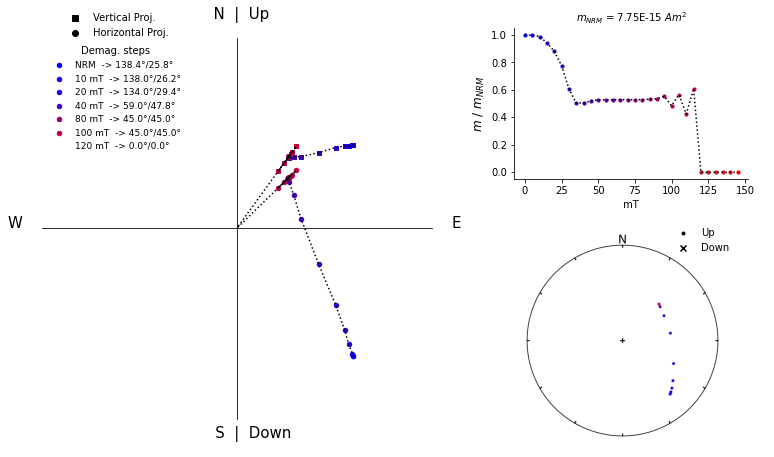

In [14]:
# %matplotlib notebook
label_steps = [0, 10, 20, 40, 80, 100, 120, 150]
# label_steps = [0, 2, 4, 8, 10, 12, 14, 16, 18]
image_D_I = zijderveld_plot(AF_steps, mx_mean, my_mean, mz_mean, label_steps)

image_D_I[0].savefig('image1.pdf', dpi=500, facecolor='w', bbox_inches='tight')
D = image_D_I[1]
I = image_D_I[2]